<a href="https://colab.research.google.com/github/andersonkstro/Meu-Portfolio/blob/master/ProjetoHamburgueria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset da Hamburgueria2047 do município de Marabá-PA.

Vamos analisar as vendas por dias da semana, meses do ano e suas categorias.

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date
import datetime as dt

sns.set_style()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
# Importando o dataset

df = pd.read_excel('/content/Cópia de Historico_Itens_Vendidos de 01-01-18 à 31-12-18.xlsx')

In [ ]:
# Verificando as primeiras linhas do dataset
df.head()

,Data/Hora Item,Qtd.,Valor Un. Item,Valor. Tot. Item,Tipo de Item,Nome Prod.,Tipo Prod.,Cat. Prod.,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.,Data Ab. Ped.,Data Fec. Ped.,Tipo Ped.,Stat. Ped.
0,2018-03-05 19:03:29.296,1,17.0,17.0,Produto,207 +BACON,Produto,Hambúrgueres,17.0,6187.0,NaN,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,Finalizado Pago
1,2018-03-05 19:06:18.572,1,22.0,22.0,Produto,207 PRIME,Produto,Hambúrgueres,22.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
2,2018-03-05 19:06:24.578,1,3.0,3.0,Produto,COCA COLA LATA,Produto,Refrigerantes,4.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
3,2018-03-05 19:10:04.523,1,15.0,15.0,Produto,207 CLÁSSICO,Produto,Hambúrgueres,15.0,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago
4,2018-03-05 19:10:04.523,1,1.5,1.5,Complemento,QUEIJO ADICIONAL,Complemento,Complemento,1.5,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago


In [ ]:
# Informações adicionais do nosso conjunto de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data/Hora Item    10532 non-null  datetime64[ns]
 1   Qtd.              10533 non-null  int64         
 2   Valor Un. Item    10532 non-null  float64       
 3   Valor. Tot. Item  10533 non-null  float64       
 4   Tipo de Item      10532 non-null  object        
 5   Nome Prod.        10532 non-null  object        
 6   Tipo Prod.        10532 non-null  object        
 7   Cat. Prod.        10532 non-null  object        
 8   Valor Prod.       10532 non-null  float64       
 9   Cod. Ped.         10532 non-null  float64       
 10  Núm. Mesa/Com.    2267 non-null   float64       
 11  Data Ab. Ped.     10532 non-null  datetime64[ns]
 12  Data Fec. Ped.    10532 non-null  datetime64[ns]
 13  Tipo Ped.         10532 non-null  object        
 14  Stat. Ped.        1053

**Tamanho do Dataset.**

---



---



In [ ]:
df.shape

(10533, 15)

Verificando os valores ausentes

---



---



In [ ]:
df.isnull().sum()

Data/Hora Item         1
Qtd.                   0
Valor Un. Item         1
Valor. Tot. Item       0
Tipo de Item           1
Nome Prod.             1
Tipo Prod.             1
Cat. Prod.             1
Valor Prod.            1
Cod. Ped.              1
Núm. Mesa/Com.      8266
Data Ab. Ped.          1
Data Fec. Ped.         1
Tipo Ped.              1
Stat. Ped.             1
dtype: int64

% de Colunas nulas
---



---



In [ ]:
df.isnull().sum() / df.shape[0] * 100

Data/Hora Item       0.009494
Qtd.                 0.000000
Valor Un. Item       0.009494
Valor. Tot. Item     0.000000
Tipo de Item         0.009494
Nome Prod.           0.009494
Tipo Prod.           0.009494
Cat. Prod.           0.009494
Valor Prod.          0.009494
Cod. Ped.            0.009494
Núm. Mesa/Com.      78.477167
Data Ab. Ped.        0.009494
Data Fec. Ped.       0.009494
Tipo Ped.            0.009494
Stat. Ped.           0.009494
dtype: float64

Dados estatísticos

---



---



In [ ]:
df.describe()

,Qtd.,Valor Un. Item,Valor. Tot. Item,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.
count,10533.000000,10532.000000,10533.000000,10532.000000,10532.000000,2267.000000
mean,2.179816,13.239271,29.048894,13.475978,8922.573111,7.341420
std,111.847651,7.106302,1490.539012,6.910087,1503.848371,18.970337
min,1.000000,1.000000,1.000000,1.000000,6187.000000,1.000000
25%,1.000000,5.000000,5.500000,6.000000,7636.000000,1.000000
50%,1.000000,15.000000,15.000000,16.000000,8943.500000,2.000000
75%,1.000000,20.000000,20.000000,20.000000,10287.250000,7.000000
max,11480.000000,30.000000,152986.000000,22.000000,11369.000000,102.000000


Análise exploratória dos dados
---



---



---



Removendo as colunas com valores em branco

In [ ]:
df.isnull().sum()

Data/Hora Item         1
Qtd.                   0
Valor Un. Item         1
Valor. Tot. Item       0
Tipo de Item           1
Nome Prod.             1
Tipo Prod.             1
Cat. Prod.             1
Valor Prod.            1
Cod. Ped.              1
Núm. Mesa/Com.      8266
Data Ab. Ped.          1
Data Fec. Ped.         1
Tipo Ped.              1
Stat. Ped.             1
dtype: int64

In [ ]:
df.drop(["Cod. Ped."], axis=1, inplace=True)
df.drop(["Núm. Mesa/Com."], axis=1, inplace=True)

Verificando o resultado

In [ ]:
df.isnull().sum()

Data/Hora Item      1
Qtd.                0
Valor Un. Item      1
Valor. Tot. Item    0
Tipo de Item        1
Nome Prod.          1
Tipo Prod.          1
Cat. Prod.          1
Valor Prod.         1
Data Ab. Ped.       1
Data Fec. Ped.      1
Tipo Ped.           1
Stat. Ped.          1
dtype: int64

Analisando as colunas

---



---



---



In [ ]:
df.columns

Index(['Data/Hora Item', 'Qtd.', 'Valor Un. Item', 'Valor. Tot. Item',
       'Tipo de Item', 'Nome Prod.', 'Tipo Prod.', 'Cat. Prod.', 'Valor Prod.',
       'Data Ab. Ped.', 'Data Fec. Ped.', 'Tipo Ped.', 'Stat. Ped.'],
      dtype='object')

Renomeando para melhor entendimento

In [ ]:
colunaNova = ['Data', 'Qtd', 'ValorUnidade', 'TotalUnidade',
       'TipoItem', 'Produto', 'TipoProduto', 'Categoria', 'ValorProduto',
       'HoraAbertPed', 'HoraFechPed', 'TipoPedido', 'StatuSPedido']
# Aplicando ao dataset
df.columns = colunaNova

Verificando o resultado

In [ ]:
df.columns

Index(['Data', 'Qtd', 'ValorUnidade', 'TotalUnidade', 'TipoItem', 'Produto',
       'TipoProduto', 'Categoria', 'ValorProduto', 'HoraAbertPed',
       'HoraFechPed', 'TipoPedido', 'StatuSPedido'],
      dtype='object')

In [ ]:
df.head()

,Data,Qtd,ValorUnidade,TotalUnidade,TipoItem,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido,StatuSPedido
0,2018-03-05 19:03:29.296,1,17.0,17.0,Produto,207 +BACON,Produto,Hambúrgueres,17.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,Finalizado Pago
1,2018-03-05 19:06:18.572,1,22.0,22.0,Produto,207 PRIME,Produto,Hambúrgueres,22.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
2,2018-03-05 19:06:24.578,1,3.0,3.0,Produto,COCA COLA LATA,Produto,Refrigerantes,4.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
3,2018-03-05 19:10:04.523,1,15.0,15.0,Produto,207 CLÁSSICO,Produto,Hambúrgueres,15.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago
4,2018-03-05 19:10:04.523,1,1.5,1.5,Complemento,QUEIJO ADICIONAL,Complemento,Complemento,1.5,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago


Removendo as colunas TipoItem e StatuSPedido por não servirem para nosso projeto

---



---



In [ ]:
df.drop(["TipoItem"], axis=1, inplace=True)
df.drop(["StatuSPedido"], axis=1, inplace=True)

Verificando resultado

In [ ]:
df.head()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido
0,2018-03-05 19:03:29.296,1,17.0,17.0,207 +BACON,Produto,Hambúrgueres,17.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery
1,2018-03-05 19:06:18.572,1,22.0,22.0,207 PRIME,Produto,Hambúrgueres,22.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery
2,2018-03-05 19:06:24.578,1,3.0,3.0,COCA COLA LATA,Produto,Refrigerantes,4.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery
3,2018-03-05 19:10:04.523,1,15.0,15.0,207 CLÁSSICO,Produto,Hambúrgueres,15.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery
4,2018-03-05 19:10:04.523,1,1.5,1.5,QUEIJO ADICIONAL,Complemento,Complemento,1.5,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery


Consultando as útlimas linhas do nosso dataset

In [ ]:
df.tail()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido
10528,2018-12-30 22:37:39.490,1,5.0,5.0,* Excluído * SUCO,Produto,Sucos,5.0,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10529,2018-12-30 22:41:57.277,1,2.5,2.5,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10530,2018-12-30 22:41:59.290,1,2.5,2.5,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10531,2018-12-30 22:47:23.911,1,6.5,6.5,COCA COLA 1 LT,Produto,Refrigerantes,6.5,2018-12-30 22:30:08.793,2018-12-30 23:01:08.671,Mesa/Comanda
10532,NaT,11480,NaN,152986.0,NaN,NaN,NaN,NaN,NaT,NaT,NaN


Excluindo as informações da última linha do Dataset.

In [ ]:
df.drop([10532], axis=0, inplace=True)

Resultado

In [ ]:
df.tail()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido
10527,2018-12-30 22:37:38.913,1,5.0,5.0,* Excluído * SUCO,Produto,Sucos,5.0,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10528,2018-12-30 22:37:39.490,1,5.0,5.0,* Excluído * SUCO,Produto,Sucos,5.0,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10529,2018-12-30 22:41:57.277,1,2.5,2.5,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10530,2018-12-30 22:41:59.290,1,2.5,2.5,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10531,2018-12-30 22:47:23.911,1,6.5,6.5,COCA COLA 1 LT,Produto,Refrigerantes,6.5,2018-12-30 22:30:08.793,2018-12-30 23:01:08.671,Mesa/Comanda


**Verificar os valores nulos novamente do nosso conjunto de dados.**

---



---



In [ ]:
df.isnull().sum()

Data            0
Qtd             0
ValorUnidade    0
TotalUnidade    0
Produto         0
TipoProduto     0
Categoria       0
ValorProduto    0
HoraAbertPed    0
HoraFechPed     0
TipoPedido      0
dtype: int64

## Feature engineering

---



---



---



In [ ]:
# colocando a variavel data como date.time

df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
# Veirficando o tipo de dados da coluna

df['Data']

0       2018-03-05 19:03:29.296
1       2018-03-05 19:06:18.572
2       2018-03-05 19:06:24.578
3       2018-03-05 19:10:04.523
4       2018-03-05 19:10:04.523
                  ...          
10527   2018-12-30 22:37:38.913
10528   2018-12-30 22:37:39.490
10529   2018-12-30 22:41:57.277
10530   2018-12-30 22:41:59.290
10531   2018-12-30 22:47:23.911
Name: Data, Length: 10532, dtype: datetime64[ns]

In [ ]:
# Extraindo e criando as horas das colunas aberturaped e fechamentoped.

df["HoraAbertura"] = df["HoraAbertPed"].apply(lambda x:dt.time(x.hour, x.minute, x.second))
df["HoraFechamento"] = df["HoraFechPed"].apply(lambda x:dt.time(x.hour, x.minute, x.second))

In [ ]:
# Extraindo e criando colunas de Dias da Semana, Mês e Hora.

df["DiaSemana"] = df["Data"].apply(lambda x: x.dayofweek)
df["Mes"] = df["Data"].apply(lambda x: x.month)
df["Hora"] = df["Data"].apply(lambda x: x.hour)

In [ ]:
# Criando um dicionário com os nomes dos dias da semana

dias = {0:"Seg",1:"Ter",2:"Qua",3:"Qui",4:"Sex",5:"Sab",6:"Dom"}

#Criando um dicionário com as inicais dos meses do ano.
meses = {1:"Jan",2:"Fev",3:"Mar",4:"Abr",5:"Mai",6:"Jun",7:"Jul",8:'Ago',9:"Set",10:"Out",11:"Nov",12:"Dez"}

# Atribuindo os nomes para a coluna DiaSemana

df["DiaSemana"] = df["DiaSemana"].map(dias)

# Atribuindo os nomes para os meses.

df["Mes"] = df["Mes"].map(meses)

**Visulizando o nosso conjunto de dados com as informações novas.**

---



---



---



In [ ]:
df.head()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido,HoraAbertura,HoraFechamento,DiaSemana,Mes,Hora
0,2018-03-05 19:03:29.296,1,17.0,17.0,207 +BACON,Produto,Hambúrgueres,17.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,19:02:22,19:58:54,Seg,Mar,19
1,2018-03-05 19:06:18.572,1,22.0,22.0,207 PRIME,Produto,Hambúrgueres,22.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,19:06:00,19:59:16,Seg,Mar,19
2,2018-03-05 19:06:24.578,1,3.0,3.0,COCA COLA LATA,Produto,Refrigerantes,4.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,19:06:00,19:59:16,Seg,Mar,19
3,2018-03-05 19:10:04.523,1,15.0,15.0,207 CLÁSSICO,Produto,Hambúrgueres,15.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,19:09:11,19:58:35,Seg,Mar,19
4,2018-03-05 19:10:04.523,1,1.5,1.5,QUEIJO ADICIONAL,Complemento,Complemento,1.5,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,19:09:11,19:58:35,Seg,Mar,19


**Visualizando um pairplot para identificar algum comportamento entre as variáveis.**

---



---



---



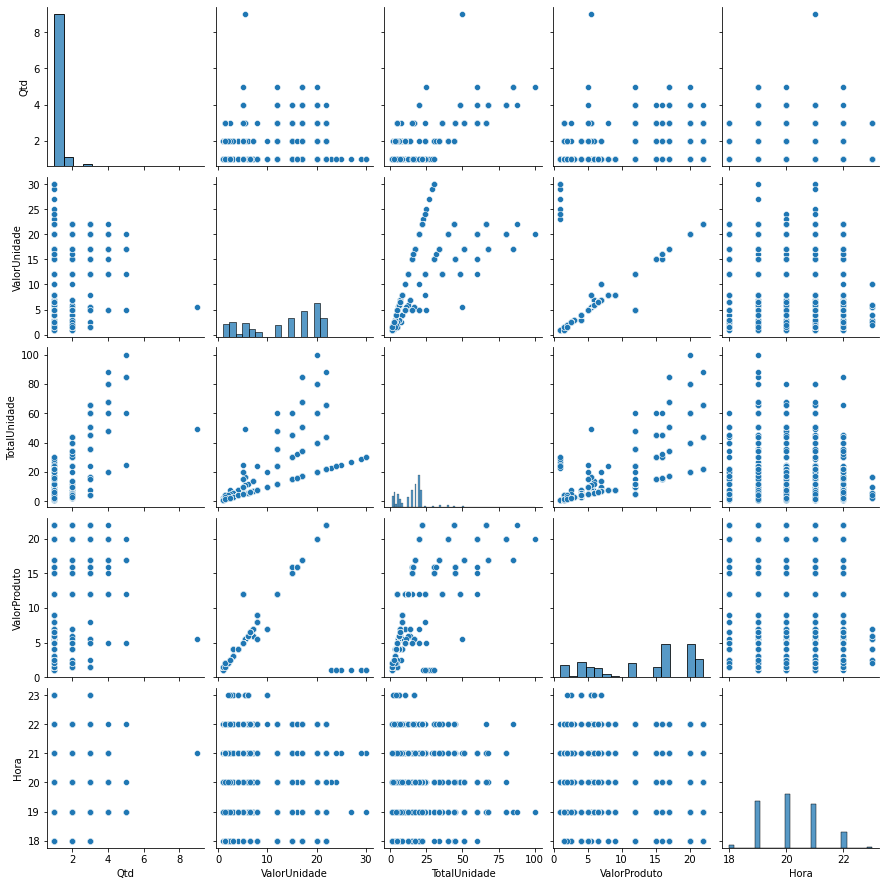

In [ ]:
sns.pairplot(df)

## **Visulização dos dados.**

Text(0.5, 1.0, 'Pedidos por Horario')

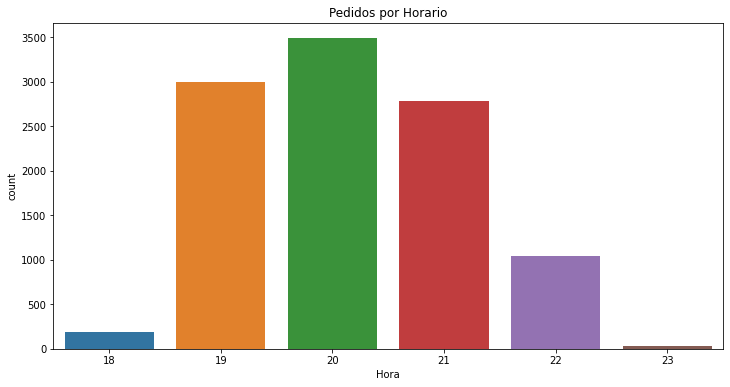

In [ ]:
# Gráfico de barras com pedidos por horários

plt.figure(figsize=(12,6))
sns.countplot(x = "Hora", data=df, palette=None)
plt.title("Pedidos por Horario")

Maior fluxo de pedidos entre 19:00 até as 21:00

Text(0.5, 1.0, 'Pedidos por Mês')

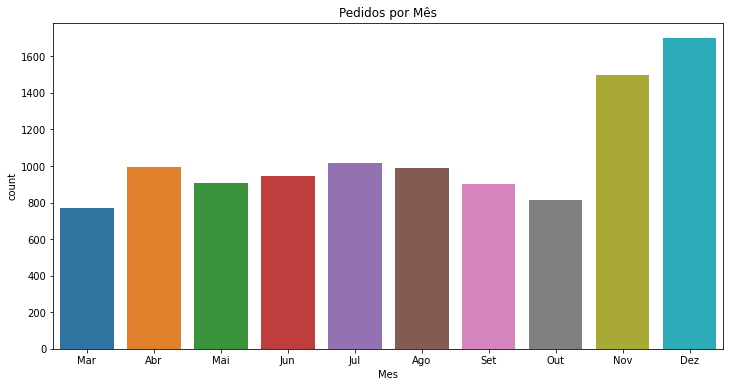

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Mes", data=df, palette=None, order=None)
plt.title("Pedidos por Mês")

O gráfico pmostra que a maior concentração de pedidos está no mês de Dezembro. Em Abril houve um volume diferente em relação aos demais e Novembro disparou.


Text(0.5, 1.0, 'Por dia de Semana')

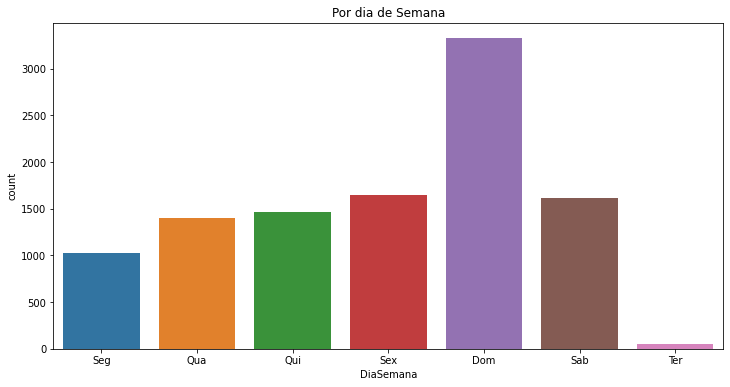

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x= "DiaSemana", data=df, palette=None)
plt.title("Por dia de Semana")

**Domingo é lider de pedidos.**

---



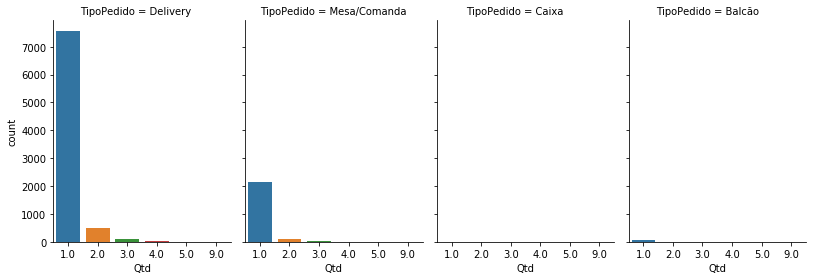

In [ ]:
sns.catplot(x="Qtd", col="TipoPedido",
                data=df, kind="count",
                height=4, aspect=.7);

**A maioria dos pedidos, ou seja, 81.77% são feitos por telefone/aplicativo(Delivery), sem a necessidade de loja física.**

---



In [ ]:
df["TipoPedido"].value_counts() / 100

Delivery        81.77
Mesa/Comanda    22.67
Balcão           0.80
Caixa            0.08
Name: TipoPedido, dtype: float64

Text(0.5, 1.0, 'Por Categoria')

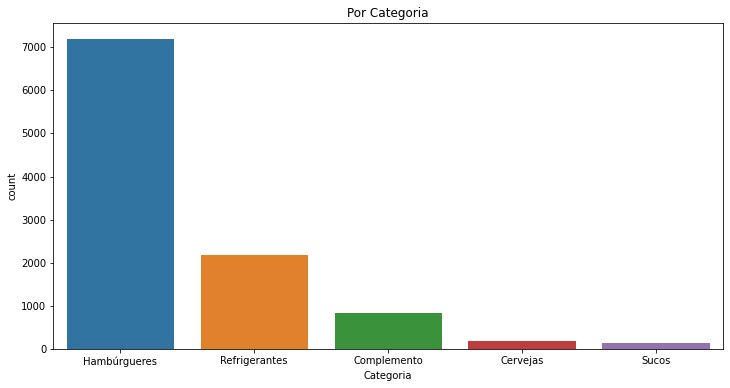

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Categoria", data=df, palette=None)
plt.title("Por Categoria")

**Podemos notar que não existe uma relação de pedidos com refrigerantes significativa. As pessoas compram mais hamburgueres do que um pedido "casado", ou seja, hamburguer + refrigerante.**

---



---



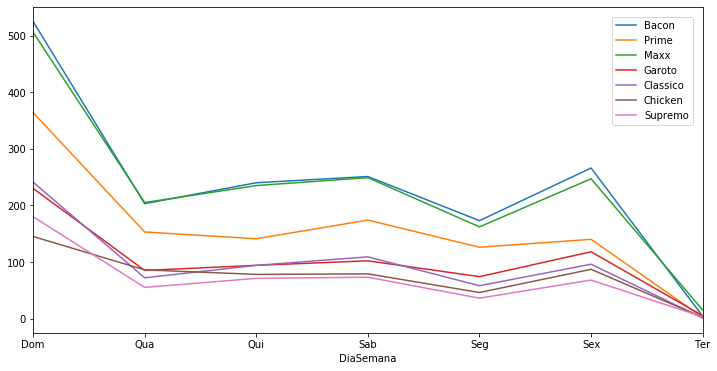

In [ ]:
plt.figure(figsize=(12,6))
df[df['Produto']=='207 +BACON'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=='207 PRIME'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=='207 MAXX'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=="207 GAROTO"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="207 CLÁSSICO"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="207 CHICKEN"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="207 SUPREMO"].groupby("DiaSemana").count()["Categoria"].plot()
plt.legend(["Bacon", "Prime", "Maxx","Garoto","Classico","Chicken","Supremo"], loc = 0, borderaxespad=1)

**Ranking dos Hamburgueres.** 

---



---



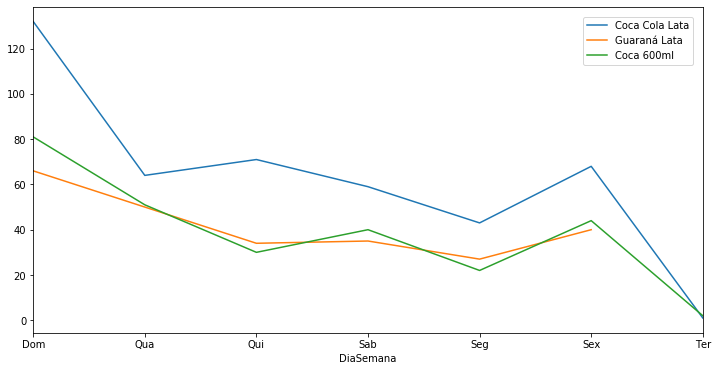

In [ ]:
plt.figure(figsize=(12,6))
df[df['Produto']=='COCA COLA LATA'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=="GUARANÁ ANTÁRTICA LATA"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="COCA COLA 600ML"].groupby("DiaSemana").count()["Categoria"].plot()
plt.legend(["Coca Cola Lata", "Guaraná Lata","Coca 600ml"], loc = 0, borderaxespad=1)

**Ranking dos refrigerantes.**

---



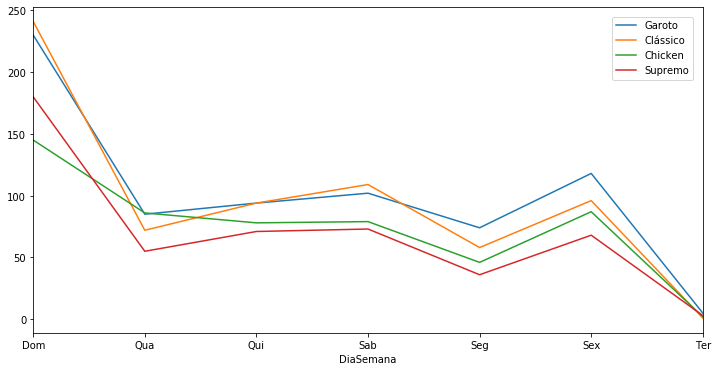

In [ ]:
plt.figure(figsize=(12,6))

plt.legend(["Garoto","Clássico","Chicken","Supremo"], loc=0, borderaxespad=1)